# 時間型資料之特徵工程

作業程式碼
本範例將使用 UCI 資料平台中的 Beijing PM2.5 Data 提供的資料集，連結如下：https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data 

請完成以下數個技巧的操作：
1. 透過 Linear Regression 補值
2. 透過 差補法 補植
3. 差分（Differencing）
4. 移動平均（Moving Average）

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 輸入資料

In [2]:
# 輸入資料 
file_path = r"D:\Github\ML100Days\PRSA_data_2010.1.1-2014.12.31.csv"
raw_data = pd.read_csv(file_path)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   year    41757 non-null  int64  
 2   month   41757 non-null  int64  
 3   day     41757 non-null  int64  
 4   hour    41757 non-null  int64  
 5   pm2.5   41638 non-null  float64
 6   DEWP    41757 non-null  int64  
 7   TEMP    41757 non-null  float64
 8   PRES    41757 non-null  float64
 9   cbwd    41757 non-null  object 
 10  Iws     41757 non-null  float64
 11  Is      41757 non-null  int64  
 12  Ir      41757 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.1+ MB


In [3]:
raw_data['pm2.5']

0        129.0
1        148.0
2        159.0
3        181.0
4        138.0
         ...  
41752      8.0
41753     10.0
41754     10.0
41755      8.0
41756     12.0
Name: pm2.5, Length: 41757, dtype: float64

## 目標一：透過 Linear Regression 把 pm2.5 欄位進行補值

In [4]:
linear_data = raw_data.copy()
linear_data['pm2.5'].interpolate(method='linear')

0        129.0
1        148.0
2        159.0
3        181.0
4        138.0
         ...  
41752      8.0
41753     10.0
41754     10.0
41755      8.0
41756     12.0
Name: pm2.5, Length: 41757, dtype: float64

## 目標二：透過 差補法 把 pm2.5 欄位進行補值

In [5]:
diff_fill_data = raw_data.copy()
diff_fill_data['pm2.5'] = diff_fill_data['pm2.5'].ffill()
diff_fill_data['pm2.5']

0        129.0
1        148.0
2        159.0
3        181.0
4        138.0
         ...  
41752      8.0
41753     10.0
41754     10.0
41755      8.0
41756     12.0
Name: pm2.5, Length: 41757, dtype: float64

## 目標三：挑選其中一個數值欄位，進行三階差分、五階差分，並分別繪製出原始資料與差分後資料的折線圖

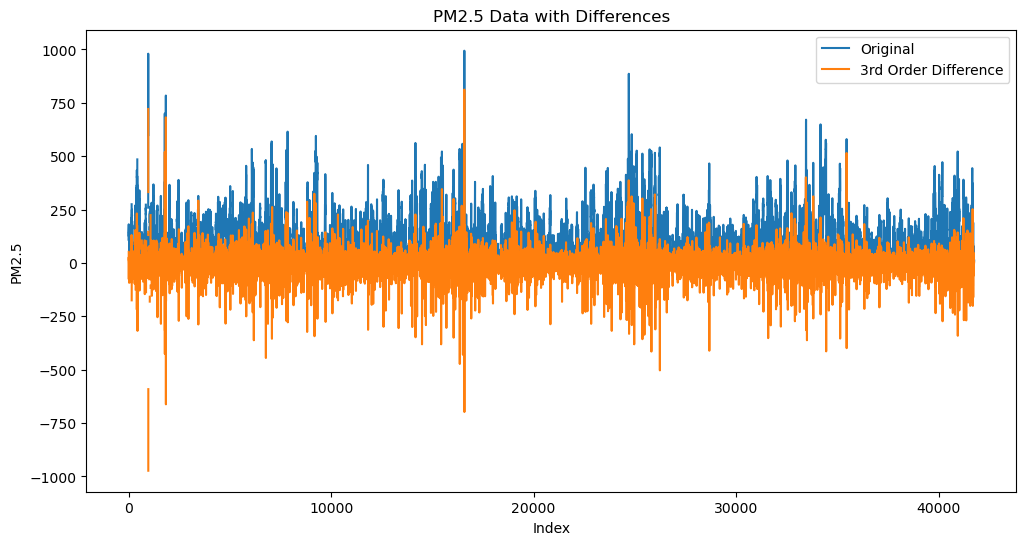

In [8]:
pm25_data = raw_data['pm2.5']
pm25_diff_3 = pm25_data.diff(periods=3)
plt.figure(figsize=(12, 6))
plt.plot(pm25_data, label='Original')
plt.plot(pm25_diff_3, label='3rd Order Difference')
plt.legend()
plt.title('PM2.5 Data with Differences')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()

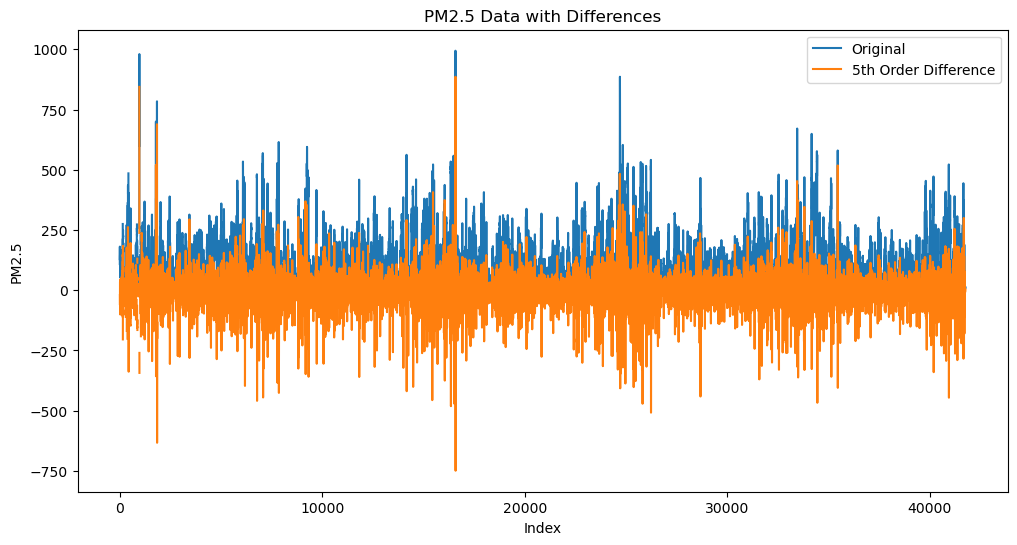

In [9]:
pm25_data = raw_data['pm2.5']
pm25_diff_5 = pm25_data.diff(periods=5)
plt.figure(figsize=(12, 6))
plt.plot(pm25_data, label='Original')
plt.plot(pm25_diff_5, label='5th Order Difference')
plt.legend()
plt.title('PM2.5 Data with Differences')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()

## 目標四：挑選其中一個數值欄位，進行移動平均，window 分別為 3 跟 6，並分別繪製出原始資料與差分後資料的折線圖

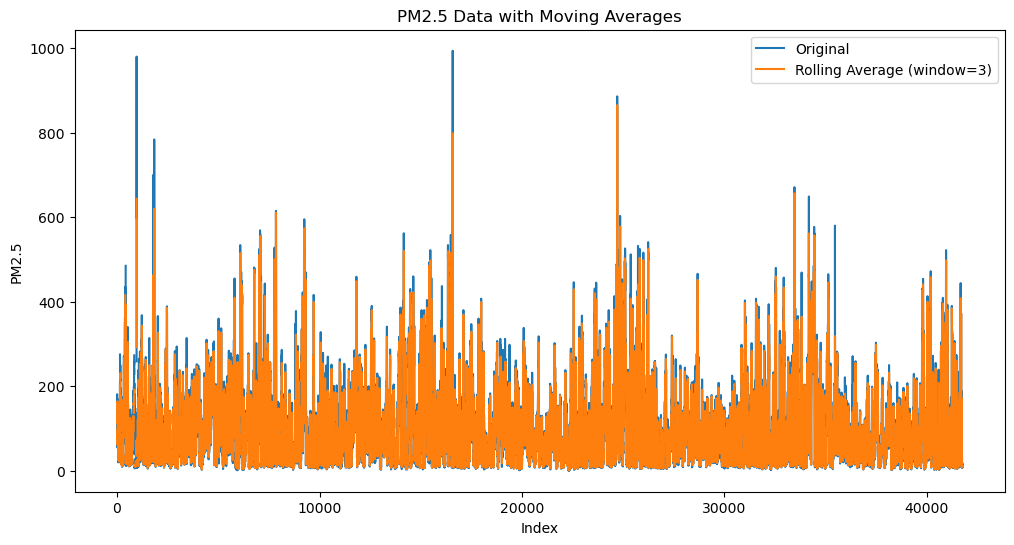

In [10]:
pm25_rolling_3 = pm25_data.rolling(window=3).mean()
plt.figure(figsize=(12, 6))
plt.plot(pm25_data, label='Original')
plt.plot(pm25_rolling_3, label='Rolling Average (window=3)')
plt.legend()
plt.title('PM2.5 Data with Moving Averages')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()

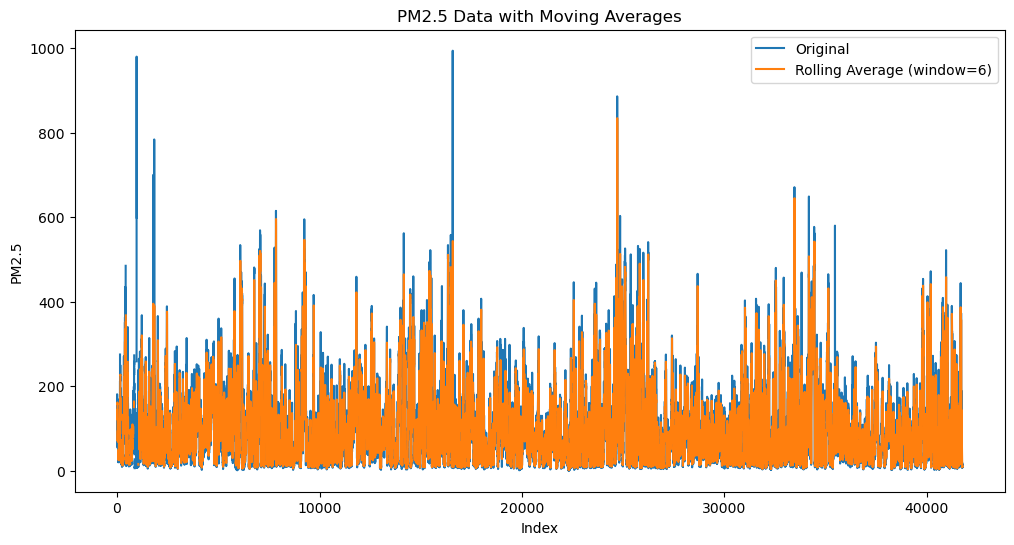

In [11]:
pm25_rolling_6 = pm25_data.rolling(window=6).mean()

plt.figure(figsize=(12, 6))
plt.plot(pm25_data, label='Original')
plt.plot(pm25_rolling_6, label='Rolling Average (window=6)')
plt.legend()
plt.title('PM2.5 Data with Moving Averages')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.show()